# Squid Game (Glass Tiles)

In [2]:
import pandas as pd

In [3]:
#constant
num_of_player = 16
num_of_steps = 19 #18 steps on glass and 1 on finish line
single_prob = 0.5

#create empty dataframe
df = pd.DataFrame(index=(f"Player {i}" for i in range(0,num_of_player+1)), columns=[f"Step {i}" for i in range(0,num_of_steps+1)])
df["Total"] = 0
df = df.fillna(0)

# initialize player 0 to always get 0 number of steps
df.iloc[0,0] = 1 

## Assumptions:
1. Once a step is discovered everyone will know and never forget. So there is no scenario when someone is hesitant to step because they forget which glass tile is the correct one and then die.
2. Every player will go according to their number so player 1 go first then player 2, and so on
3. No one can tell which glass is the correct one, so there is no old dude that can distinguish glass based on refraction or sound
4. For the sake of simplicity let's forget about the time limit for a second


$$P(p_i,x)=\sum_{j=0}^{x-1}(\frac{1}{2})^{x-j}*P(p_i-1,j)$$
Where:

    $P(p_i,x)$ = Probability of player number i to end in step number x(step number 1 start in the first pairs of glass tiles)

    x = The step player i will end on
Note:
x-1 because if player i-1 get into step x, then player i will at least get into step x+1 

Description of Formula:

Probability of player number i to end in step number x is equal to the sum of probability of player number i-1 end in step j multiplied by the probability of player number i choose x-j-1 correct steps and followed by 1 incorrect step.

Except some edge cases:

If x is the last step, then because the last step is not to a glass, player i will take 1 less guess. if player i-1 reach last step, player i can also reach the same step since there is no further step. For this case the formula changes into

$$P(p_i,x)=\sum_{j=0}^{x}(\frac{1}{2})^{max((x-j-1),0)}*P(p_i-1,j)$$

So the final formula can be written as:

$$P(p_i,x)=\sum_{j=0}^{x-1+isLastStep}(\frac{1}{2})^{max((x-j-isLastStep),0)}*P(p_i-1,j)$$

Note:
max((x-j-is_last_step),0) because if j == x and x is the last step then x-j-is_last_step = -1, and a player can not make -1 number of guess.




In [4]:
#applying formula
for player_no in range(1,num_of_player+1):
    for step_no in range(0,num_of_steps+1):
        is_last_step = 1 if step_no == num_of_steps else 0
        for last_step in range(0,step_no+is_last_step):
            df.iloc[player_no,step_no] += (single_prob**(max(step_no-last_step-is_last_step,0))) * df.iloc[player_no-1,last_step]

#Making sure the total probability for each player is exactly 1
for player_no in range(num_of_player+1):
    df["Total"].iloc[player_no] = df.iloc[player_no].sum(axis=0)
df

C:\Users\alber\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Step 0,Step 1,Step 2,Step 3,Step 4,Step 5,Step 6,Step 7,Step 8,Step 9,...,Step 11,Step 12,Step 13,Step 14,Step 15,Step 16,Step 17,Step 18,Step 19,Total
Player 0,1,0.0,0.00,0.000,0.0000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
Player 1,0,0.5,0.25,0.125,0.0625,0.03125,0.015625,0.007812,0.003906,0.001953,...,0.000488,0.000244,0.000122,0.000061,0.000031,0.000015,0.000008,0.000004,0.000004,1.0
Player 2,0,0.0,0.25,0.250,0.1875,0.12500,0.078125,0.046875,0.027344,0.015625,...,0.004883,0.002686,0.001465,0.000793,0.000427,0.000229,0.000122,0.000065,0.000072,1.0
Player 3,0,0.0,0.00,0.125,0.1875,0.18750,0.156250,0.117188,0.082031,0.054688,...,0.021973,0.013428,0.008057,0.004761,0.002777,0.001602,0.000916,0.000519,0.000656,1.0
Player 4,0,0.0,0.00,0.000,0.0625,0.12500,0.156250,0.156250,0.136719,0.109375,...,0.058594,0.040283,0.026855,0.017456,0.011108,0.006943,0.004272,0.002594,0.003769,1.0
Player 5,0,0.0,0.00,0.000,0.0000,0.03125,0.078125,0.117188,0.136719,0.136719,...,0.102539,0.080566,0.060425,0.043640,0.030548,0.020828,0.013885,0.009079,0.015442,1.0
Player 6,0,0.0,0.00,0.000,0.0000,0.00000,0.015625,0.046875,0.082031,0.109375,...,0.123047,0.112793,0.096680,0.078552,0.061096,0.045822,0.033325,0.023605,0.048126,1.0
Player 7,0,0.0,0.00,0.000,0.0000,0.00000,0.000000,0.007812,0.027344,0.054688,...,0.102539,0.112793,0.112793,0.104736,0.091644,0.076370,0.061096,0.047211,0.118942,1.0
Player 8,0,0.0,0.00,0.000,0.0000,0.00000,0.000000,0.000000,0.003906,0.015625,...,0.058594,0.080566,0.096680,0.104736,0.104736,0.098190,0.087280,0.074188,0.240341,1.0
Player 9,0,0.0,0.00,0.000,0.0000,0.00000,0.000000,0.000000,0.000000,0.001953,...,0.021973,0.040283,0.060425,0.078552,0.091644,0.098190,0.098190,0.092735,0.407265,1.0


In [17]:
df.rename(columns={"Step 19":"Finish"}).iloc[1:,1:]

,Step 1,Step 2,Step 3,Step 4,Step 5,Step 6,Step 7,Step 8,Step 9,Step 10,Step 11,Step 12,Step 13,Step 14,Step 15,Step 16,Step 17,Step 18,Finish,Total
Player 1,0.5,0.25,0.125,0.0625,0.03125,0.015625,0.007812,0.003906,0.001953,0.000977,0.000488,0.000244,0.000122,0.000061,0.000031,0.000015,0.000008,0.000004,0.000004,1.0
Player 2,0.0,0.25,0.250,0.1875,0.12500,0.078125,0.046875,0.027344,0.015625,0.008789,0.004883,0.002686,0.001465,0.000793,0.000427,0.000229,0.000122,0.000065,0.000072,1.0
Player 3,0.0,0.00,0.125,0.1875,0.18750,0.156250,0.117188,0.082031,0.054688,0.035156,0.021973,0.013428,0.008057,0.004761,0.002777,0.001602,0.000916,0.000519,0.000656,1.0
Player 4,0.0,0.00,0.000,0.0625,0.12500,0.156250,0.156250,0.136719,0.109375,0.082031,0.058594,0.040283,0.026855,0.017456,0.011108,0.006943,0.004272,0.002594,0.003769,1.0
Player 5,0.0,0.00,0.000,0.0000,0.03125,0.078125,0.117188,0.136719,0.136719,0.123047,0.102539,0.080566,0.060425,0.043640,0.030548,0.020828,0.013885,0.009079,0.015442,1.0
Player 6,0.0,0.00,0.000,0.0000,0.00000,0.015625,0.046875,0.082031,0.109375,0.123047,0.123047,0.112793,0.096680,0.078552,0.061096,0.045822,0.033325,0.023605,0.048126,1.0
Player 7,0.0,0.00,0.000,0.0000,0.00000,0.000000,0.007812,0.027344,0.054688,0.082031,0.102539,0.112793,0.112793,0.104736,0.091644,0.076370,0.061096,0.047211,0.118942,1.0
Player 8,0.0,0.00,0.000,0.0000,0.00000,0.000000,0.000000,0.003906,0.015625,0.035156,0.058594,0.080566,0.096680,0.104736,0.104736,0.098190,0.087280,0.074188,0.240341,1.0
Player 9,0.0,0.00,0.000,0.0000,0.00000,0.000000,0.000000,0.000000,0.001953,0.008789,0.021973,0.040283,0.060425,0.078552,0.091644,0.098190,0.098190,0.092735,0.407265,1.0
Player 10,0.0,0.00,0.000,0.0000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000977,0.004883,0.013428,0.026855,0.043640,0.061096,0.076370,0.087280,0.092735,0.592735,1.0


In [22]:
#showing result
result = df.iloc[1:,-2].apply(lambda x: f"{round(x*100,2)}%")
result

Player 1       0.0%
Player 2      0.01%
Player 3      0.07%
Player 4      0.38%
Player 5      1.54%
Player 6      4.81%
Player 7     11.89%
Player 8     24.03%
Player 9     40.73%
Player 10    59.27%
Player 11    75.97%
Player 12    88.11%
Player 13    95.19%
Player 14    98.46%
Player 15    99.62%
Player 16    99.93%
Name: Step 19, dtype: object

## Let's plot to better understand the probability of each player to win

Text(0, 0.5, 'Probability of Winning')

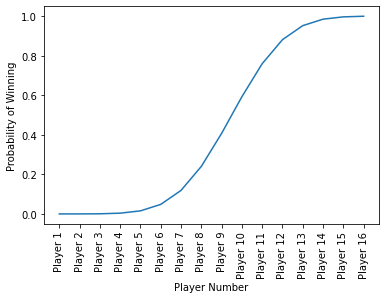

In [24]:
import matplotlib.pyplot as plt

plt.plot(df.iloc[1:,-2])
plt.xticks(rotation=90)
plt.xlabel("Player Number")
plt.ylabel("Probability of Winning")